# Activation Functions

In [3]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

Just like a neural network, you apply an activation function to the activation map as shown in the following image:

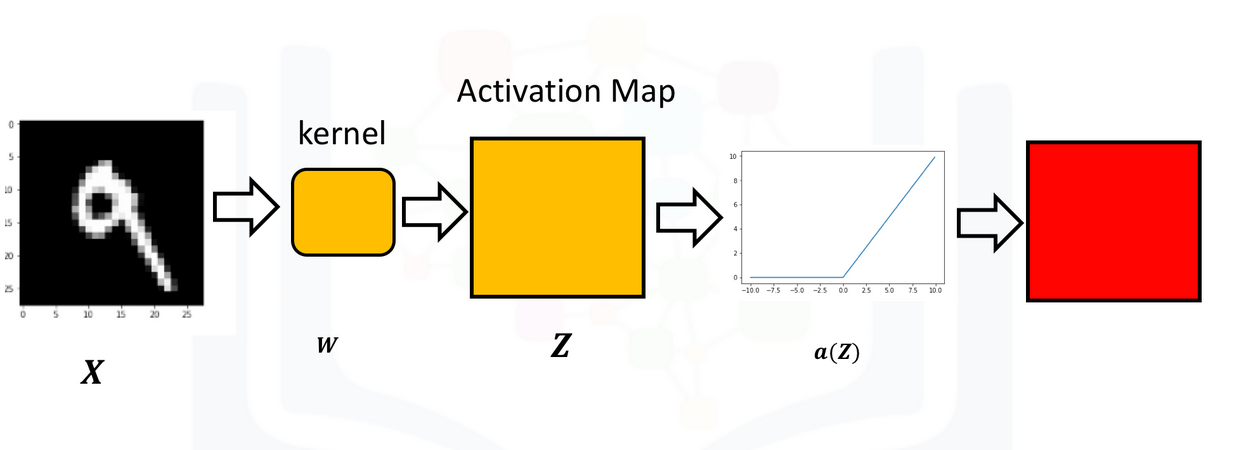

In [1]:
from IPython.display import Image
Image(filename="C:/Users/SND13188/Desktop/IMAGES_COURSE/Figure22.png",width=600,height=600)



Create a kernel and image as usual. Set the bias to zero: 

In [4]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0]=Gx
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight', tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])), ('bias', tensor([0.]))])

In [5]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

The following image shows the image and kernel: 

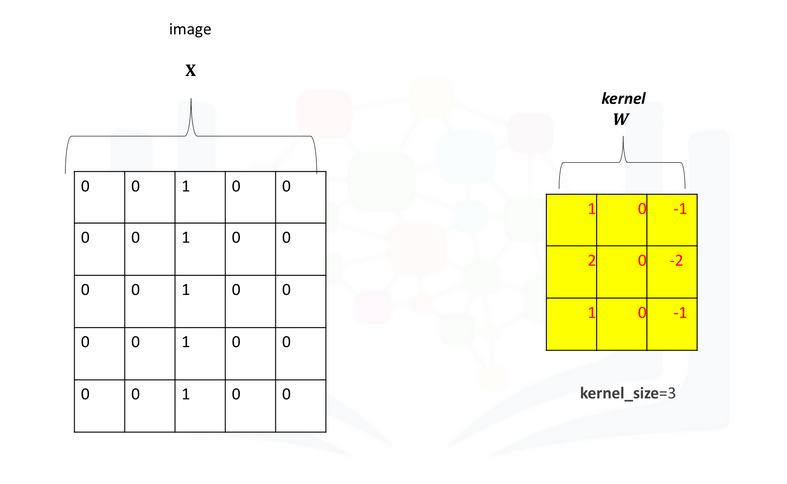

In [6]:
Image(filename="C:/Users/SND13188/Desktop/IMAGES_COURSE/Figure23.png",width=600,height=600)

Apply convolution to the image: 

In [7]:
Z=conv(image)
Z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ThnnConv2DBackward>)

Apply the activation function to the activation map. This will apply the activation function to each element in the activation map.

In [8]:
A=torch.relu(Z)
A

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [9]:
relu = nn.ReLU()
relu(Z)

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

### Max Pooling

Consider the following image: 

In [10]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

Max pooling simply takes the maximum value in each region. Consider the following image. For the first region, max pooling simply takes the largest element in a yellow region. 

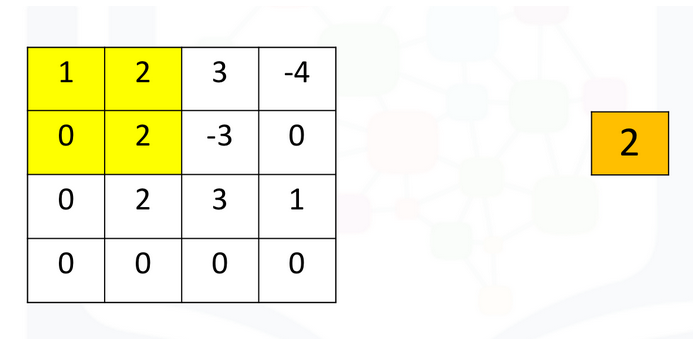

In [11]:
Image(filename="C:/Users/SND13188/Desktop/IMAGES_COURSE/Figure24.png",width=600,height=600)

Create a maxpooling object in 2d as follows and perform max pooling as follows: 

In [12]:
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1)

tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

Here's the code in Pytorch: 

In [13]:
max1=torch.nn.MaxPool2d(2)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])